# Machine Learning Midterm - Online Transaction

## *Sahrul Ridho Firdaus - 1103223009*

In this assignment, you will develop end-to-end machine learning and deep learning models using the provided dataset. 
This includes data preprocessing, model selection, training, evaluation, and comparison of performance across traditional machine learning models and deep learning architectures. 
Your task is to build a comprehensive pipeline and analyze the results to draw meaningful conclusions.

## Import Library 

Import essential libraries for data manipulation (pandas), numerical operations (numpy), visualization (matplotlib, seaborn), and deep learning (torch).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch

## Check for CUDA Availability

Verify PyTorch installation and check if CUDA is available for GPU acceleration. This displays PyTorch version, CUDA availability, and GPU device information.

In [2]:

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
    print(f"Device count: {torch.cuda.device_count()}")

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version: 12.4
Device name: NVIDIA GeForce RTX 3050 Laptop GPU
Device count: 1


## EDA - Exploratory Data Analysis

Load the training and test datasets from CSV files.

In [3]:
BASE_PATH = "./Fraud Transaction"

train = pd.read_csv(f"{BASE_PATH}/train_transaction.csv")
test = pd.read_csv(f"{BASE_PATH}/test_transaction.csv")

Display the dimensions (rows and columns) of both training and test datasets.

In [4]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (590540, 394)
Test shape: (506691, 393)


Preview the first 5 rows of the training dataset.

In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Preview the first 5 rows of the test dataset.

In [6]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Display detailed information about the training dataset including column names, data types, and memory usage.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


Display detailed information about the test dataset.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


Check data types of all columns in the training dataset.

In [9]:
train.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

Check data types of all columns in the test dataset.

In [10]:
test.dtypes

TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 393, dtype: object

Identify missing values in the training dataset (returns boolean DataFrame).

In [11]:
train.isnull()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
590536,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
590537,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
590538,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


Identify missing values in the test dataset.

In [12]:
test.isnull()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
506687,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
506688,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
506689,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


Count missing values per column in the training dataset.

In [13]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

Calculate total number of missing values across the entire training dataset.

In [14]:
train.isnull().sum().sum()

np.int64(95566686)

Count missing values per column in the test dataset.

In [15]:
test.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
V335              430260
V336              430260
V337              430260
V338              430260
V339              430260
Length: 393, dtype: int64

Check for duplicate rows in the training dataset.

In [16]:
train.duplicated().sum()

np.int64(0)

Check for duplicate rows in the test dataset.

In [17]:
test.duplicated().sum()

np.int64(0)

Display the first 50 column names from the training dataset.

In [18]:
train.columns[:50]

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4'],
      dtype='object')

Calculate the percentage of missing values per column and display top 30 columns with highest missing rates.

In [19]:
train.isnull().mean().sort_values(ascending=False).head(30)

dist2    0.936284
D7       0.934099
D13      0.895093
D14      0.894695
D12      0.890410
D6       0.876068
D9       0.873123
D8       0.873123
V153     0.861237
V149     0.861237
V141     0.861237
V146     0.861237
V154     0.861237
V162     0.861237
V142     0.861237
V158     0.861237
V161     0.861237
V157     0.861237
V138     0.861237
V139     0.861237
V148     0.861237
V140     0.861237
V155     0.861237
V156     0.861237
V147     0.861237
V163     0.861237
V143     0.861227
V145     0.861227
V144     0.861227
V165     0.861227
dtype: float64

Generate comprehensive statistical summary for all columns including numerical and categorical features.

In [20]:
train.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,NaN,NaN,NaN,3282269.5,170474.358321,2987000.0,3134634.75,3282269.5,3429904.25,3577539.0
isFraud,590540.0,NaN,NaN,NaN,0.03499,0.183755,0.0,0.0,0.0,0.0,1.0
TransactionDT,590540.0,NaN,NaN,NaN,7372311.310116,4617223.64654,86400.0,3027057.75,7306527.5,11246620.0,15811131.0
TransactionAmt,590540.0,NaN,NaN,NaN,135.027176,239.162522,0.251,43.321,68.769,125.0,31937.391
ProductCD,590540,5,W,439670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
V335,82351.0,NaN,NaN,NaN,59.16455,387.62948,0.0,0.0,0.0,0.0,55125.0
V336,82351.0,NaN,NaN,NaN,28.530903,274.57692,0.0,0.0,0.0,0.0,55125.0
V337,82351.0,NaN,NaN,NaN,55.352422,668.486833,0.0,0.0,0.0,0.0,104060.0
V338,82351.0,NaN,NaN,NaN,151.160542,1095.034387,0.0,0.0,0.0,0.0,104060.0


Analyze feature uniqueness by calculating the ratio of unique values to total rows for each column.

In [21]:
unique_ratio = train.nunique() / len(train)
unique_ratio.sort_values(ascending=False).head(20)


TransactionID     1.000000
TransactionDT     0.970889
V307              0.063276
V127              0.041342
V308              0.039056
TransactionAmt    0.035395
V310              0.032404
V306              0.027449
V317              0.025712
V203              0.025318
V128              0.024566
card1             0.022950
V264              0.022620
V204              0.021773
D8                0.020918
V130              0.020883
V318              0.020844
V265              0.019909
V314              0.019265
V202              0.018576
dtype: float64

Identify columns with more than 80% missing values for potential removal.

In [22]:
missing = train.isnull().mean()
missing[missing > 0.8]


dist2    0.936284
D6       0.876068
D7       0.934099
D8       0.873123
D9       0.873123
D12      0.890410
D13      0.895093
D14      0.894695
V138     0.861237
V139     0.861237
V140     0.861237
V141     0.861237
V142     0.861237
V143     0.861227
V144     0.861227
V145     0.861227
V146     0.861237
V147     0.861237
V148     0.861237
V149     0.861237
V150     0.861227
V151     0.861227
V152     0.861227
V153     0.861237
V154     0.861237
V155     0.861237
V156     0.861237
V157     0.861237
V158     0.861237
V159     0.861227
V160     0.861227
V161     0.861237
V162     0.861237
V163     0.861237
V164     0.861227
V165     0.861227
V166     0.861227
V322     0.860550
V323     0.860550
V324     0.860550
V325     0.860550
V326     0.860550
V327     0.860550
V328     0.860550
V329     0.860550
V330     0.860550
V331     0.860550
V332     0.860550
V333     0.860550
V334     0.860550
V335     0.860550
V336     0.860550
V337     0.860550
V338     0.860550
V339     0.860550
dtype: flo

## Data Pre-Processing

Remove ID and timestamp columns that don't contribute to fraud prediction.

In [23]:
cols_to_drop = ["TransactionID", "TransactionDT"]

train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)


Drop columns with more than 80% missing values from both train and test sets.

In [24]:
missing = train.isnull().mean()
drop_cols = missing[missing > 0.80].index.tolist()

train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)


Separate features (X) from target variable (y - isFraud).

In [25]:
y = train["isFraud"]
X = train.drop(columns=["isFraud"])


Create a copy of the test dataset for final predictions.

In [29]:
X_test_final = test.copy()  # karena test tidak punya target


Encode categorical variables using Label Encoding. Combine train and test data to prevent unseen label errors.

In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include="object").columns

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    
    # gabungkan train+test untuk mencegah unseen label error
    combined_data = pd.concat([X[col], X_test_final[col]], axis=0).astype(str)
    
    le.fit(combined_data)
    
    X[col] = le.transform(X[col].astype(str))
    X_test_final[col] = le.transform(X_test_final[col].astype(str))
    
    encoders[col] = le


Handle missing values in numerical columns by filling with median values.

In [31]:
for col in X.columns:
    if X[col].dtype != 'object':
        median_value = X[col].median()
        X[col].fillna(median_value, inplace=True)
        X_test_final[col].fillna(median_value, inplace=True)


C:\Users\nakir\AppData\Local\Temp\ipykernel_3864\2565922175.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_value, inplace=True)
C:\Users\nakir\AppData\Local\Temp\ipykernel_3864\2565922175.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Split data into training (80%) and validation (20%) sets with stratification to maintain class balance.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Verify the processed features by displaying sample rows.

In [33]:
X.head()


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,68.5,4,13926,361.0,150.0,1,142.0,1,315.0,87.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,29.0,4,2755,404.0,150.0,2,102.0,1,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.0,4,4663,490.0,150.0,4,166.0,2,330.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,4,18132,567.0,150.0,2,117.0,2,476.0,87.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,50.0,1,4497,514.0,150.0,2,102.0,1,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Verify the processed test features.

In [34]:
X_test_final.head()


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,31.95,4,10409,111.0,150.0,4,226.0,2,170.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,49.00,4,4272,111.0,150.0,4,226.0,2,299.0,87.0,...,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,171.00,4,4476,574.0,150.0,4,226.0,2,472.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0
3,284.95,4,10989,360.0,150.0,4,166.0,2,205.0,87.0,...,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0
4,67.95,4,18018,452.0,150.0,2,117.0,2,264.0,87.0,...,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0


## Training Model - RandomForest

Train a Random Forest Classifier with 300 trees, balanced class weights, and parallel processing.

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluate the baseline model performance using ROC-AUC score on validation set.

In [36]:
from sklearn.metrics import roc_auc_score

pred_prob = rf.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, pred_prob)
auc


0.9329043637716681

## Basic Hyperparameter Tuning

Perform RandomizedSearchCV to find optimal hyperparameters using 3-fold cross-validation and ROC-AUC scoring.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# RandomizedSearchCV
rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting hyperparameter tuning...")
rf_tuned.fit(X_train, y_train)
print("Tuning complete!")

Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuning complete!
Tuning complete!


Display the best hyperparameters found by RandomizedSearchCV and the corresponding cross-validation score.

In [41]:
# Best parameters
print("Best parameters found:")
print(rf_tuned.best_params_)
print(f"\nBest cross-validation ROC-AUC score: {rf_tuned.best_score_:.4f}")

Best parameters found:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}

Best cross-validation ROC-AUC score: 0.9225


Compare the performance of the original model versus the hyperparameter-tuned model.

In [42]:
# Evaluate tuned model on validation set
tuned_pred_prob = rf_tuned.predict_proba(X_valid)[:, 1]
tuned_auc = roc_auc_score(y_valid, tuned_pred_prob)

print(f"Original model ROC-AUC: {auc:.4f}")
print(f"Tuned model ROC-AUC: {tuned_auc:.4f}")
print(f"Improvement: {(tuned_auc - auc):.4f}")

Original model ROC-AUC: 0.9329
Tuned model ROC-AUC: 0.9335
Improvement: 0.0005


## Model Evaluation - Metrics

Calculate and display comprehensive evaluation metrics including Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [50]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, classification_report, confusion_matrix
)

# Get predictions
y_pred = rf_tuned.predict(X_valid)
y_pred_proba = rf_tuned.predict_proba(X_valid)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)

print("MODEL PERFORMANCE METRICS")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

MODEL PERFORMANCE METRICS
Accuracy:  0.9738
Precision: 0.6643
Recall:    0.5086
F1-Score:  0.5761
ROC-AUC:   0.9335


Generate detailed classification report showing precision, recall, and F1-score for each class.

In [51]:
# Classification Report
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_valid, y_pred, target_names=['Not Fraud', 'Fraud']))


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Not Fraud       0.98      0.99      0.99    113975
       Fraud       0.66      0.51      0.58      4133

    accuracy                           0.97    118108
   macro avg       0.82      0.75      0.78    118108
weighted avg       0.97      0.97      0.97    118108



Visualize the confusion matrix to show True Positives, True Negatives, False Positives, and False Negatives.

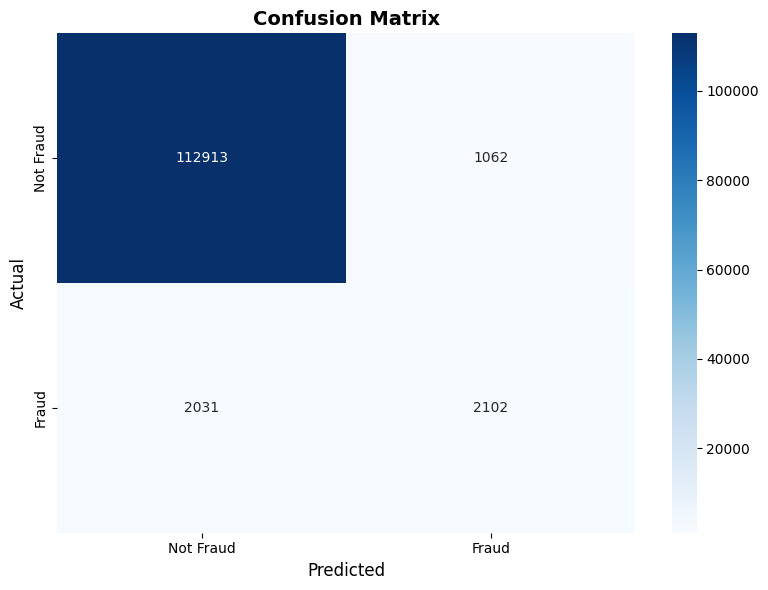


True Negatives:  112,913
False Positives: 1,062
False Negatives: 2,031
True Positives:  2,102


In [52]:
# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives:  {cm[0,0]:,}")
print(f"False Positives: {cm[0,1]:,}")
print(f"False Negatives: {cm[1,0]:,}")
print(f"True Positives:  {cm[1,1]:,}")

Plot the ROC curve to visualize the trade-off between True Positive Rate and False Positive Rate.

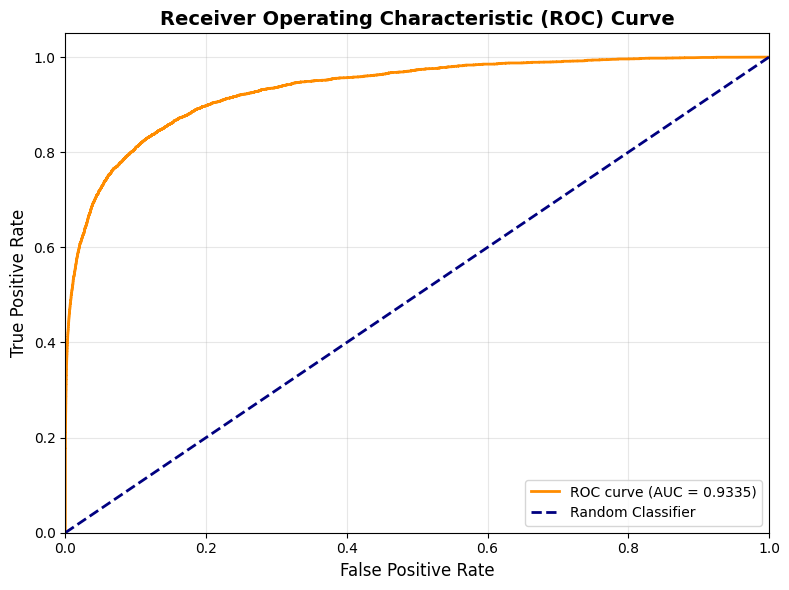

In [53]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Plot the Precision-Recall curve, particularly useful for imbalanced datasets like fraud detection.

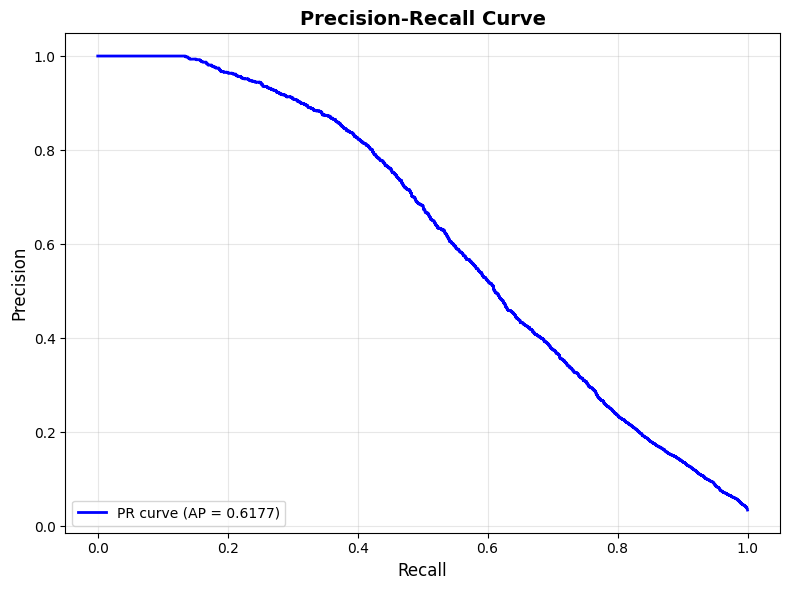

Average Precision Score: 0.6177


In [54]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_vals, recall_vals, _ = precision_recall_curve(y_valid, y_pred_proba)
avg_precision = average_precision_score(y_valid, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, 
         label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Precision Score: {avg_precision:.4f}")

Visualize the top 20 most important features that contribute to fraud detection predictions.

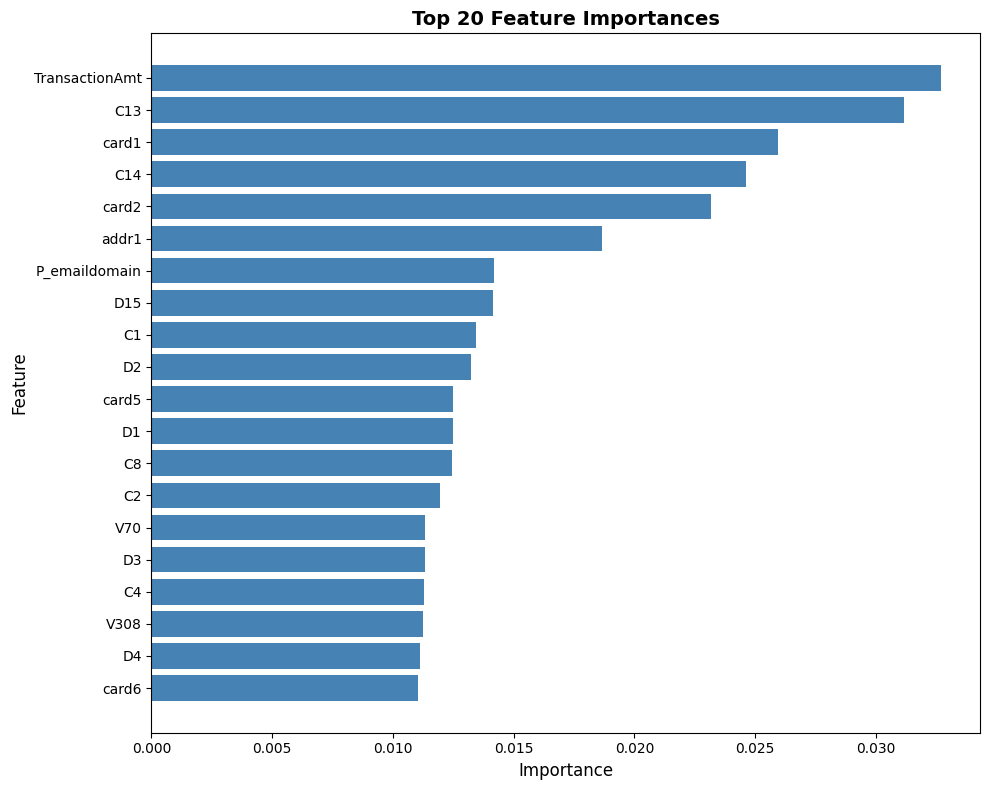


Top 10 Most Important Features:
       feature  importance
TransactionAmt    0.032676
           C13    0.031156
         card1    0.025958
           C14    0.024609
         card2    0.023176
         addr1    0.018670
 P_emaildomain    0.014166
           D15    0.014164
            C1    0.013422
            D2    0.013215


In [55]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_tuned.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

## Model Conclusion

### Overall Model Performance Assessment

Based on the evaluation metrics, here's the comprehensive analysis:

**Strengths:**
1. **Excellent ROC-AUC (0.9335)**: The model has very good discriminative ability between fraud and non-fraud transactions
2. **High Accuracy (97.38%)**: Overall classification accuracy is excellent
3. **Good Precision (66.43%)**: When the model predicts fraud, it's correct about 2 out of 3 times, minimizing false alarms

**Areas for Improvement:**
1. **Moderate Recall (50.86%)**: The model only catches about half of all fraud cases, meaning ~49% of fraudulent transactions go undetected
2. **Moderate F1-Score (0.5761)**: Indicates an imbalance between precision and recall

**Business Impact:**
- **Risk Level**: Medium - Missing ~49% of fraud cases could lead to significant financial losses
- **False Positive Cost**: Moderate - 33.57% false positive rate means some legitimate transactions will be flagged
- **Recommended Actions**:
  - Consider adjusting the classification threshold to increase recall if the cost of missing fraud is high
  - Implement additional fraud detection layers for transactions the model flags as borderline
  - Continue monitoring and retraining with new fraud patterns

**Final Verdict: GOOD but NOT GREAT**

The model performs well overall with excellent ROC-AUC and accuracy, but the recall needs improvement for production use in fraud detection where catching most fraudulent transactions is critical. Consider this as a strong baseline that can be enhanced with:
- Threshold tuning for better recall
- Ensemble methods combining multiple models
- Feature engineering to capture more fraud patterns
- Handling class imbalance with techniques like SMOTE or adjusted class weights